**ПРОЕКТ ПО ТЕМЕ: ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ**

**Описание проекта:** Мы работаем в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.


**Задача проекта:** Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


**Описание исходных данных:**

Проект будет состоять из двух частей:
 1. В первой части будет представлен файл с гипотезами, который включает в себя:
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. Во второй части представлены два файла:

   2.1 **Orders**-данные о заказах
   * `transactionId` — идентификатор заказа;
   * `visitorId` — идентификатор пользователя, совершившего заказ;
   * `date` — дата, когда был совершён заказ;
   * `revenue` — выручка заказа;
   * `group` — группа A/B-теста, в которую попал заказ.
   2.2 **Visitors**-данные о пользователях
   * `date` — дата;
   * `group` — группа A/B-теста;
   * `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста
    
**План исследования:**
Исследование будет состоять из двух частей:
1. В первой части мы получим данные о гипотезах и приоритизируем их
2. Во второй части:
   * Получим данные, обработаем и изучим их;
   * Запустим A/B тест
   * Проанализируем результаты

## Первая часть. Приортизиция гипотез

### Гипотезы

In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
#Импортируем библиотеки

In [2]:
hypotheses = pd.read_csv('/datasets/hypothesis.csv', sep=',') #получаем данные из файла
hypotheses.columns = hypotheses.columns.str.lower() #приводим названия столбцов к нижнему регистру
hypotheses.index += 1 #меняем нумерацию строк
pd.set_option('max_colwidth', 120) #изменяем масштаб столбца
pd.set_option('display.width', 500)
hypotheses

,hypothesis,reach,impact,confidence,efforts
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В даных представлена информация о 9 подготовленных гипотезах, а также параметры `Reach`(охват пользователей) , `Impact` (влияние на пользователей), `Confidence` (уверенность в гипотезе) и `Effors`(затраты ресурсов на проверку гипотезы) измеренные по 10-бальной шкале. Проведение А/В тестов для всех гипотез очень затратно. Поэтому необходимо приоритизировать гипотезы и выбрать ту, которую будем тестиировать

### Применение фреймворка ICE и RICE

Для выявления самой перспективной гипотезы будем использовать популярные методы ICE и RICE.

In [3]:
hypotheses['ICE']=((hypotheses['impact']*hypotheses['confidence'])/hypotheses['efforts']). round(2)
#расчет значения ICE

hypotheses['RICE']=(hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['efforts'] 
#расчет значения RICE

display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))
#вывод на экран двух столбцов с номером гипотезы и параметром ICE, упорядоченные по убыванию параметра ICE


display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))
#вывод на экран двух столбцов с номером гипотезы и параметром RICE, упорядоченные по убыванию параметра RICE


,hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


,hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Пареметры ICE и RICE являются одними из самых популярных методов приоритезации. При расчете параметра ICE берут такие показали как  impact(влияние), confidence(уверенность), effort(простота). У это метода есть модификация RICE, в которой также добавляется такой показатель как reach(охват). Все параметры расчитываются обычно по 10-бальной шкале.

При расчете параметра ICE, самой перспективной оказалась 9 гипотеза, а на втором месте 1 гипотеза. Тогда как при расчете параметра RICE гипотеза номер 8 стала более преспективной. Произошло это потому что ее параметр Reach равен 10, т.е. данная гипотеза охватит всех пользоватаелей, тогда как у 9 гипотезы охват пользователей равен всего 10%. Для приоретизации гипотез важным показатем является какое кол-во пользователей она застронет. Поэтому возьмем во внимание именно параметр RICE

Для проведения A/B теста целесообразней выбрать гипотезу пол номером 8 : 

*`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`*

## Вторая часть. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `Orders`и `Visitors`.
До начала анлиза А/В теста получим данные из файлов, проанализируем и проведем предобработку

### Данные для анализа

#### Выгрузка и изучение исходных данных

In [4]:
orders = pd.read_csv('/datasets/orders.csv', sep=',') #получаем данные о заказах
visitors = pd.read_csv('/datasets/visitors.csv', sep=',') #получаем данные о пользователях

display(orders.head())
display(orders.info())

display(visitors.head())
display(visitors.info())

#выводим первые 5 строк каждого датафрйема и общую информацию

display('Колличество дубликатов в датафремйе visitors:',visitors.duplicated().sum())
display('Колличество дубликатов в датафремйе orders:',orders.duplicated().sum())
#проверяем данные на наличие дубликатов

display(visitors.describe()) #Описание числовых данных в датафрйеме visitors
display(orders.describe())#Описание числовых данных в датафрйеме orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Колличество дубликатов в датафремйе visitors:'

0

'Колличество дубликатов в датафремйе orders:'

0

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


После получения общей информации о данных, можно сказать следующее:
* При первой визуальной оценке датафреймов видно, что данные подходят к цели нашего анализа,
* В датафреймах нет пропусков, т.к. колличество строк в датафрейме совпадает с колличеством строк в каждом столбце
* Названия столбцов соответствует их содержанию, но не приведено к единому стилю. Столбцы в датарфйреме о заказах необходимо переимменовать
* Тип данных в столбцах соответствует содержанию во всех столбцах, кроме тех что связаны с датами. Тип данных в этих столбцах изменим на datetime.
* Дубликатов в данных нет
* Критичные аномалии и нулевые значения в данных также отсутствуют

#### Предобработка данных

In [5]:
orders = orders.rename(columns={'transactionId': 'transaction_id',
                               'visitorId': 'visitor_id'}) 
#переимнование столбцов
display('Наименование столбцов в датафрйеме orders:',orders.columns)
#проверяем

'Наименование столбцов в датафрйеме orders:'

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
#Изменяем тип данных на datetime в столбцах где содерджится информация о датах

**Вывод:**
Получив данные из двух датафреймов о заакзах и пользователях, можно сказать следующее о качестве исходных данных:
* Данные подходят для дальнейшего анализа
* В данных нет критичных аномалий, дубик
* Некоторые столбцы мы переименовали, привели к нижнему регистру и добавили знак '_'
* Также имзенили типы данных, что поможет нам в дальнешем анализе

### Анализ А/В теста

#### График кумулятивной выручки по группам

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5));

#проверяем корректность созданного датафрейма
if orders['date'].max()== cumulativeData['date'].max():
    print('Максимальная дата в кумулятивынх данных равна максимальной дате в исходных данных, датафрейм создан корректно')
else:
    print('Датафрейм создан не корректно')
    
if orders['date'].min()== cumulativeData['date'].min():
    print('Минимальная дата в кумулятивынх данных равна минимальной дате в исходных данных, датафрейм создан корректно')
else:
    print('Датафрейм создан не корректно')
    

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Максимальная дата в кумулятивынх данных равна максимальной дате в исходных данных, датафрейм создан корректно
Минимальная дата в кумулятивынх данных равна минимальной дате в исходных данных, датафрейм создан корректно


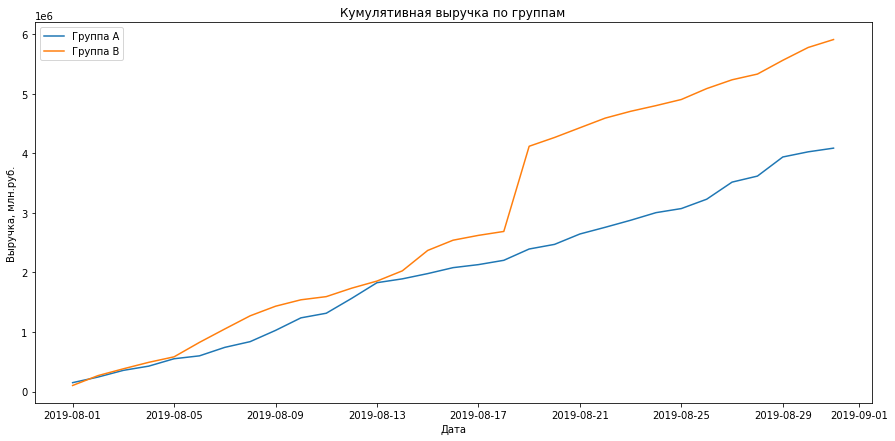

In [8]:


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# Строим график выручки по груупам А и В
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн.руб.')
plt.show;

**Вывод:**

Выручка практически всегда увеличивается в течение всего теста. Это хорошо.
Также график выручки группы В в одной точке резко вырос. Это может сигнализировать о резком росте числа заказов, либо о появлении дороготоящих заказов.

#### График кумулятивного среднего чека

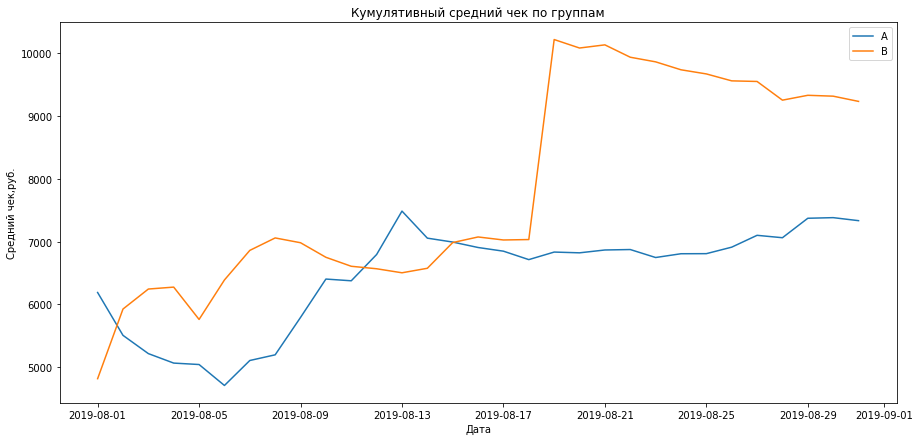

In [9]:
# Строим график среднего чека по груупам А и В
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек,руб.')
plt.show()

**Вывод:** Средний чек у двух групп скачет в первые две недели проведения теста, есть сниежния и увеличения среднего чека у обеих групп. Средний чек группы А стибилизировался после 13.08 и он стал стабильно ниже среднего чека группы В. После 17.08 средний чек у группы В резко вырос, что скорее всего связано с тем что в эту группу попали дорогостоящие заказы, что также подтверждается всплеском выручки с этого же момента.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

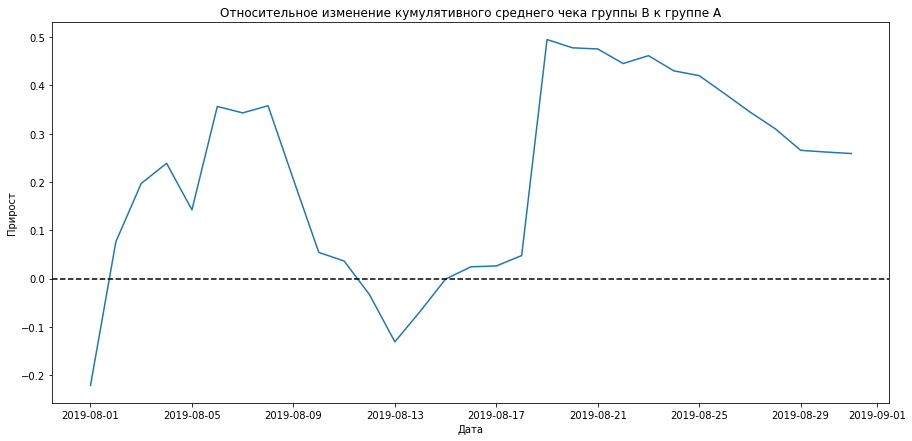

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.show()

**Вывод:** В график относительного изменения между двумя группами есть резкие увеличения и также резкие снижения. Этот график также подтверждает, что в группам появились дорогостоящие заказы, которе скорее всего являются явными выбросами.

#### График кумулятивного среднего количества заказов на посетителя по группам

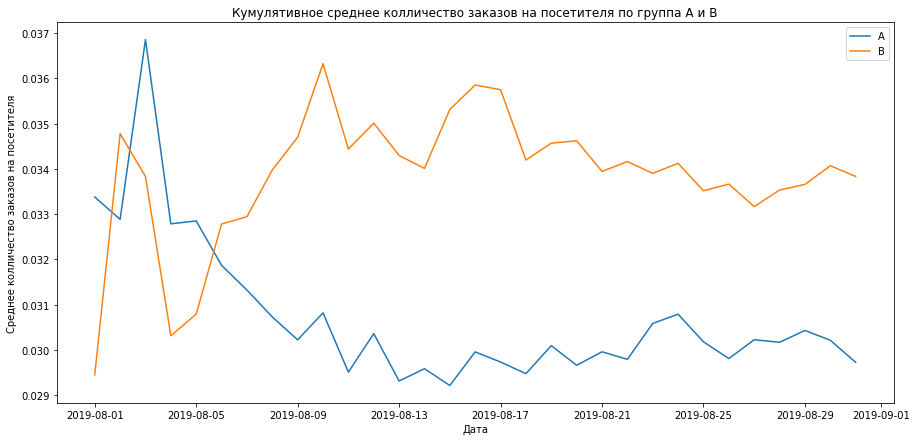

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее колличество заказов на посетителя по группа А и В')
plt.xlabel('Дата')
plt.ylabel('Среднее колличество заказов на посетителя')
plt.show()

**Вывод:** Среднее колличество заказов на посетителя резко выросло в начале теста у обоих групп.После 5 августа в группы В резко выросло колличество заказов и стабилизировалось к концу тестирования. У группы А все наоборот-среднее колличество заказов резко снизилось и было стабильно низким до конца тестирования.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

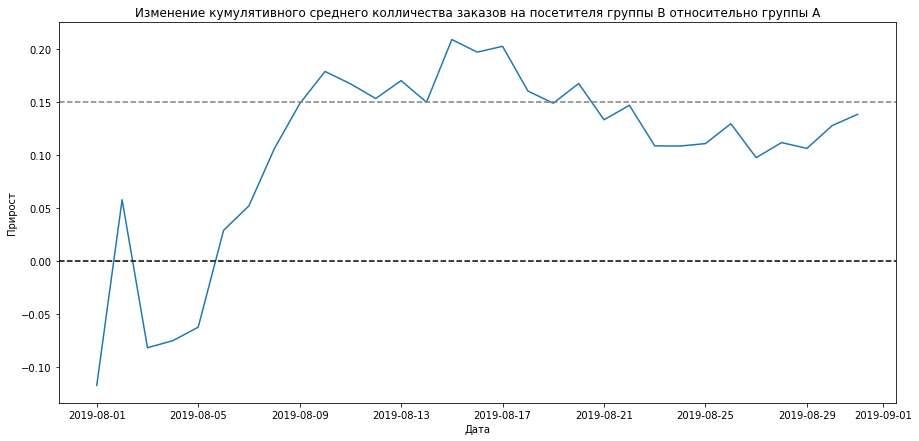

In [12]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график относительного изменения
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Изменение кумулятивного среднего колличества заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Прирост')
plt.show()

**Вывод:** С начала тестирования прирост количества заказов группы В резко вырос относительно группы А, далее было падение и стабильный рост. К концу тестирования прирост стабилизировался и стал стабильно выше относительно группы А. Вохможно это было связно с резким увеличением коллчиества заказов в группе В или появлению в этой группе каких-то аномальных значений

#### График количества заказов по пользователям.


,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


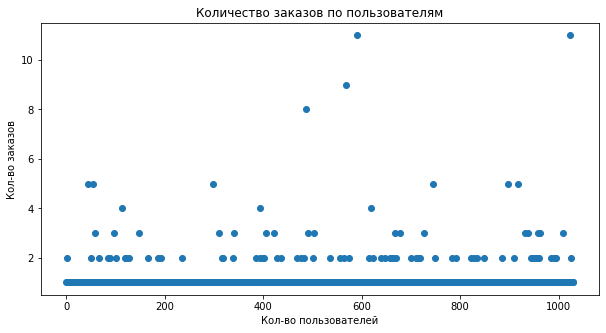

In [13]:
#группируем в таблицу по пользователям, сортируем по колл-ву заказов
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименовывам столбцы
ordersByUsers.columns = ['visitor_id', 'orders']
#вывод на экран таблицу с колличеством заказов у пользователей
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
#Cтротм график по колличетсву заказов на пользователя
x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.show()


**Вывод:** Большинство пользователей совершали до 2 заказов, также есть достаточное количество пользователей которые делали 3-4 заказа. А вот пользователей с кол-вом заказов больше 4 уже редкие и их можно считать выбросами в данных,т.к. они единичны. Но все таки в основном большинство пользователей делало не более 2 заказов.

#### 95-й и 99-й перцентили количества заказов на пользователя

In [14]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя:
print(np.percentile(ordersByUsers['orders'], [95, 99]))
percentile_95_orders=np.percentile(ordersByUsers['orders'], 95).round()
percentile_95_orders

[2. 4.]


2.0

**Вывод:** Не более 1% пользователей делают больше 4 заказов, и не более 5% пользователей делают более 2 заказов. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### График стоимостей заказов

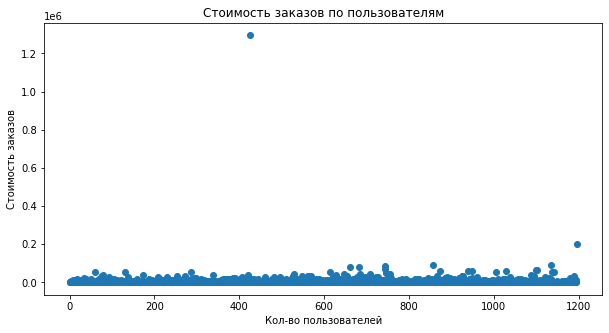

In [15]:
#построим график стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

**Вывод** На графике суммы заказов подавляющее большинство заказов находится в диапазоне до 20000 р. Однако есть 2 заказа со стоимостью заказов более 1,2 млн и выше 20000. Эти заказы единичны и их можно считать выбросами

#### 95-й и 99-й перцентили стоимости заказов

In [16]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя:
print(np.percentile(orders['revenue'], [95, 99]))
percentile_95=np.percentile(orders['revenue'], 95).round()
percentile_95

[28000.  58233.2]


28000.0

**Вывод:** Не более чем у 1% пользователей Стоимость заказов не превышает 58233 р, и у не болееч чем 5% пользователей стоимость заказов не превышает 28000 р. Исходя и графика стоимости заказов и полученных персентилей разумнее выбрать верхнюю границу как 28000. Заказы со стоимостью выше этой уже достатоно редкие


#### Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. 

Для тестирования используем критерий Манна-Уитни

Уровень статистической значимости-0,05

Сформулируем гипотезы:

`Нулевая:` ***Статистически значимых различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет.*** 

`Альтернативная:` ***Статистически значимые различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть***

-------------

In [17]:
#подготовим данные


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']



visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']



data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Статистическая значимость:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего кол-ва заказов',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

Статистическая значимость: 0.01679
Относительный прирост среднего кол-ва заказов 0.138


**Вывод:** 

* При расчете статистической значимости, применив тест Манна-Уитни, получили значение p-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Это означает, что в среднем количестве заказов между группами есть весомые различия.
* Относительный прирост среднего количества заказов группы В к группе А равен 13.8%

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Также проверим статистическую значимость различий в среднем чеке между группами.
Сформулируем гипотезы:

`Нулевая гипотеза:` ***различий в среднем чеке между группами нет***

`Альтернативная гипотеза:` ***различия в среднем чеке между группами есть***

In [18]:
print('Статистическая значимость:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Статистическая значимость: 0.729
Относительное различие среднего чека 0.259


**Вывод:** 
* При расчете статистической значимости, применив тест Манна-Уитни, получили значение p-value значительно выше 0.05, поэтому нулевую гипотезу подтверждаем. Это означает, что различий в среднем чеке между группами нет
* Относительное различие среднего чека между группами составляет 25%

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Проверим статистичекую значимость различий в среднем количестве заказов на посетителя с "очищенными" от выбросов данными.

Сформулируем гипотезы:

`Нулевая:` ***Статистически значимых различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет.***

`Алетернативная:` ***Статистически значимые различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть***

In [19]:

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > percentile_95_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > percentile_95_orders]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_95]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('Статистическая значимость:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего кол-ва заказов','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Статистическая значимость: 0.01304
Относительный прирост среднего кол-ва заказов 0.173


**Вывод:**
* По "очищенным" данным значение p-value = 0.01304 (0,01679 по "сырым" данным), это также меньше уровня статистической значимости, поэтому гипотезу о том, что различий между группами нет отвергаем. 
* Относительная разница между группами составила 17.43%- на столько конверсия группы В больше конверсии группы А (13.8% по "сырым" данным)


#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим как изменился средний чек после очистки данных

Сформулируем гипотезы:

`Нулевая:`***статистически значимых различий в среднем чеке заказа между группами нет***

`Альтернативная:` ***статистически значимые различия в среднем чеке заказа между группами есть***


In [20]:
print('Статистическая значимость:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие среднего чека',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Статистическая значимость: 0.738
Относительное различие среднего чека -0.020


**Вывод:** 
* По "очищенным" данным значение p-value = 0.798 (0,729 по "сырым" данным), это также больше уровня статистической значимости, поэтому гипотезу о том, что различий в сумме среднего чека между группами нет подтверждаем
* Относительная разница в среднем чеке между группами составила -2%- на столько средний чек группы В больше среднего чека группы А (25.9% по "сырым" данным). После очистки данных сильное отличие в среднем чеке между группам ушло.

### Результаты теста

С отделом маркетинга было подготовлено 9 гипотез. С помощью популярных фреймворков ICE и RICE былв выбра приоритетная гипотеза:
`Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`

Был проведение А/В тест по данной гипотезы, в результате которого можно слелать следюющие выводы:
* Кумулятивная выручка группы В стабильно выше выручки группы А. Есть большой скачок выручки группы В после 17.08.2019.
* Средние чеки в группах нестабильны. Но все же средний чек группы В выше чем у группы А, и резко растет после 17.08.2019
* Кумулятивный средний чек группы В стабильно выше, чем у группы А
* Подавляющее большинство пользователей слело не более 2 заказов, реже делают 4 заказа и более
* У большинсва пользователей сумма заказа не превышает 58000 р. Но при этом есть аномальное значение в группе В, которое вероятно повлияло не резкий скачок среднего чека у группе.


Также произвели расчет статистической значимости различий в среднем количестве заказов и в сумме среднего чека между группами по «сырым» и "очищенным" от выбросов данным:
* Статистическая значимость проверялась тестом Манна-Уитни. Гипотеза о равенсве среднего чека между группами отвергнули. Относительная разница между группами составила 13,8%
* После "очистки" данных результат оказался таким же: Среднее количество заказов отличается, а относительная разница составила 17,4%ю. Гипотеза о том, что различий в сумме среднего чека между группами нет, не отвергнута.  Относительная разница суммы среднего чека между группами составила -2% (против 25.9% по "сырым" данным)

`Вывод:`
После проведения теста можно сказать, что сумма среднего чека не изменилась. Также результаты тестирования говорят о том, что изменилась конверсия 13-17%. По показателям в тесте выигрвает группа В.
Рекомендуем остановить тест, т.к. зафиксировано отсутсвие различий в среднем чеке и повышение среднего кол-ва заказов

------------